In [1]:
import numpy as np

def lu_decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for k in range(n):
        U[k, k:] = A[k, k:]
        L[k:, k] = A[k:, k] / U[k, k]
        
        for i in range(k + 1, n):
            U[i, k:] -= L[i, k] * U[k, k:]
    
    # Fill 1s on the diagonal of L
    for i in range(n):
        L[i, i] = 1
    
    return L, U

# Example matrix A
A = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
              [10, 11, 12, 13, 14, 15, 16, 17, 18],
              [19, 20, 21, 22, 23, 24, 25, 26, 27],
              [28, 29, 30, 31, 32, 33, 34, 35, 36],
              [37, 38, 39, 40, 41, 42, 43, 44, 45],
              [46, 47, 48, 49, 50, 51, 52, 53, 54],
              [55, 56, 57, 58, 59, 60, 61, 62, 63],
              [64, 65, 66, 67, 68, 69, 70, 71, 72],
              [73, 74, 75, 76, 77, 78, 79, 80, 81]])

L, U = lu_decomposition(A)

print("Matrix L:")
print(L)
print("\nMatrix U:")
print(U)


Matrix L:
[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [10.          1.          0.          0.          0.          0.
   0.          0.          0.        ]
 [19.          1.81818182  1.          0.          0.          0.
   0.          0.          0.        ]
 [28.          2.63636364  1.42857143  1.          0.          0.
   0.          0.          0.        ]
 [37.          3.45454545  1.85714286  1.29032258  1.          0.
   0.          0.          0.        ]
 [46.          4.27272727  2.28571429  1.58064516  1.2195122   1.
   0.          0.          0.        ]
 [55.          5.09090909  2.71428571  1.87096774  1.43902439  1.17647059
   1.          0.          0.        ]
 [64.          5.90909091  3.14285714  2.16129032  1.65853659  1.35294118
   1.14754098  1.          0.        ]
 [73.          6.72727273  3.57142857  2.4516129   1.87804878  1.52941176
   1.29508197  1.12676056  1.        ]]

Matrix U:
[[ 1.0000

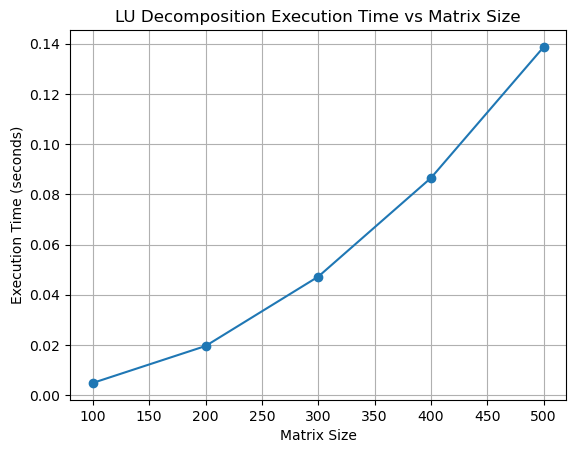

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

def lu_decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for k in range(n):
        U[k, k:] = A[k, k:]
        L[k:, k] = A[k:, k] / U[k, k]
        
        for i in range(k + 1, n):
            U[i, k:] -= L[i, k] * U[k, k:]
    
    # Fill 1s on the diagonal of L
    for i in range(n):
        L[i, i] = 1
    
    return L, U

# Benchmark function
def benchmark_lu_decomposition(matrix_sizes):
    execution_times = []
    for size in matrix_sizes:
        A = np.random.rand(size, size)  # Generate a random matrix of given size
        start_time = time.time()
        L, U = lu_decomposition(A)
        end_time = time.time()
        execution_times.append(end_time - start_time)
    return execution_times

# Matrix sizes to benchmark
matrix_sizes = [100, 200, 300, 400, 500]

# Benchmark LU decomposition
execution_times = benchmark_lu_decomposition(matrix_sizes)

# Plotting
plt.plot(matrix_sizes, execution_times, marker='o')
plt.title('LU Decomposition Execution Time vs Matrix Size')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()


Matrix size 100x100: Execution time = 0.105067 seconds
Matrix size 200x200: Execution time = 0.660187 seconds
Matrix size 300x300: Execution time = 2.218933 seconds
Matrix size 400x400: Execution time = 5.273955 seconds
Matrix size 500x500: Execution time = 10.265778 seconds


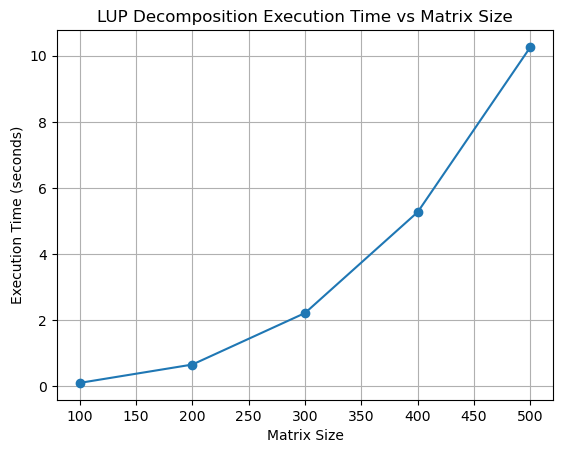

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt

def lup_decomposition(A):
    n = len(A)
    P = np.eye(n)  # Initialize permutation matrix P as identity matrix
    LU = A.copy()  # Make a copy of A to avoid modifying the original matrix
    
    for k in range(n):
        # Partial pivoting: Find the row with the maximum value in the current column
        max_index = np.argmax(np.abs(LU[k:, k])) + k
        
        # If the maximum value is 0, the matrix is singular
        if LU[max_index, k] == 0:
            raise ValueError("Singular matrix")
        
        # Swap rows in both LU and P matrices
        LU[[k, max_index]] = LU[[max_index, k]]
        P[[k, max_index]] = P[[max_index, k]]
        
        for i in range(k + 1, n):
            LU[i, k] /= LU[k, k]
            for j in range(k + 1, n):
                LU[i, j] -= LU[i, k] * LU[k, j]
    
    return P, LU

# Benchmark function
def benchmark_lup_decomposition(matrix_sizes):
    execution_times = []
    for size in matrix_sizes:
        A = np.random.rand(size, size)  # Generate a random matrix of given size
        start_time = time.time()
        P, LU = lup_decomposition(A)
        end_time = time.time()
        execution_times.append(end_time - start_time)
    return execution_times

# Matrix sizes to benchmark
matrix_sizes = [100, 200, 300, 400, 500]

# Benchmark LUP decomposition
execution_times = benchmark_lup_decomposition(matrix_sizes)

# Print execution times
for size, time_taken in zip(matrix_sizes, execution_times):
    print(f"Matrix size {size}x{size}: Execution time = {time_taken:.6f} seconds")

# Plotting
plt.plot(matrix_sizes, execution_times, marker='o')
plt.title('LUP Decomposition Execution Time vs Matrix Size')
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()


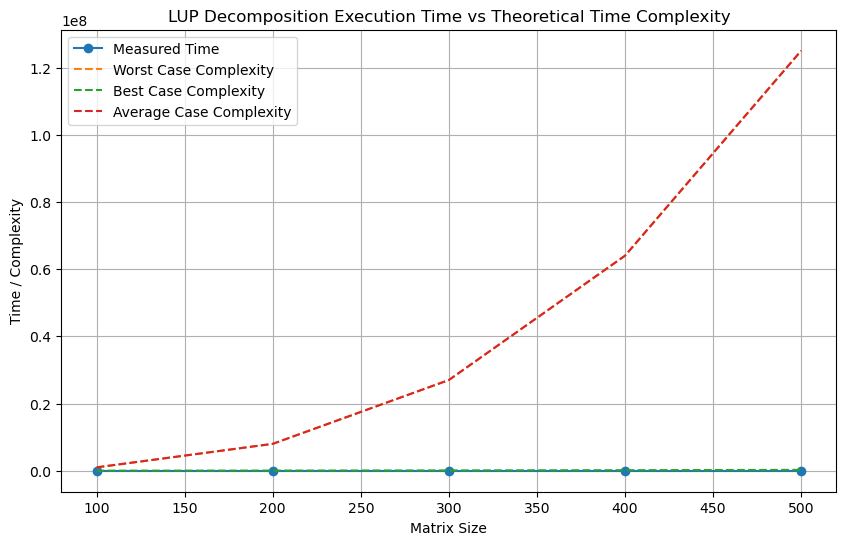

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

def lup_decomposition(A):
    n = len(A)
    P = np.eye(n)  # Initialize permutation matrix P as identity matrix
    LU = A.copy()  # Make a copy of A to avoid modifying the original matrix
    
    for k in range(n):
        # Partial pivoting: Find the row with the maximum value in the current column
        max_index = np.argmax(np.abs(LU[k:, k])) + k
        
        # If the maximum value is 0, the matrix is singular
        if LU[max_index, k] == 0:
            raise ValueError("Singular matrix")
        
        # Swap rows in both LU and P matrices
        LU[[k, max_index]] = LU[[max_index, k]]
        P[[k, max_index]] = P[[max_index, k]]
        
        for i in range(k + 1, n):
            LU[i, k] /= LU[k, k]
            for j in range(k + 1, n):
                LU[i, j] -= LU[i, k] * LU[k, j]
    
    return P, LU

# Benchmark function
def benchmark_lup_decomposition(matrix_sizes):
    execution_times = []
    for size in matrix_sizes:
        A = np.random.rand(size, size)  # Generate a random matrix of given size
        start_time = time.time()
        P, LU = lup_decomposition(A)
        end_time = time.time()
        execution_times.append(end_time - start_time)
    return execution_times

# Theoretical time complexities
def worst_case(n):
    return n**3

def best_case(n):
    return n**2

def average_case(n):
    return n**3  # For simplicity, assuming average-case complexity is the same as worst-case

# Matrix sizes to benchmark
matrix_sizes = [100, 200, 300, 400, 500]

# Benchmark LUP decomposition
execution_times = benchmark_lup_decomposition(matrix_sizes)

# Compute theoretical complexities for each matrix size
worst_case_times = [worst_case(n) for n in matrix_sizes]
best_case_times = [best_case(n) for n in matrix_sizes]
average_case_times = [average_case(n) for n in matrix_sizes]

# Plotting
plt.figure(figsize=(10, 6))

# Plot measured execution times
plt.plot(matrix_sizes, execution_times, marker='o', label='Measured Time')

# Plot theoretical complexities
plt.plot(matrix_sizes, worst_case_times, linestyle='--', label='Worst Case Complexity')
plt.plot(matrix_sizes, best_case_times, linestyle='--', label='Best Case Complexity')
plt.plot(matrix_sizes, average_case_times, linestyle='--', label='Average Case Complexity')

plt.title('LUP Decomposition Execution Time vs Theoretical Time Complexity')
plt.xlabel('Matrix Size')
plt.ylabel('Time / Complexity')
plt.legend()
plt.grid(True)
plt.show()


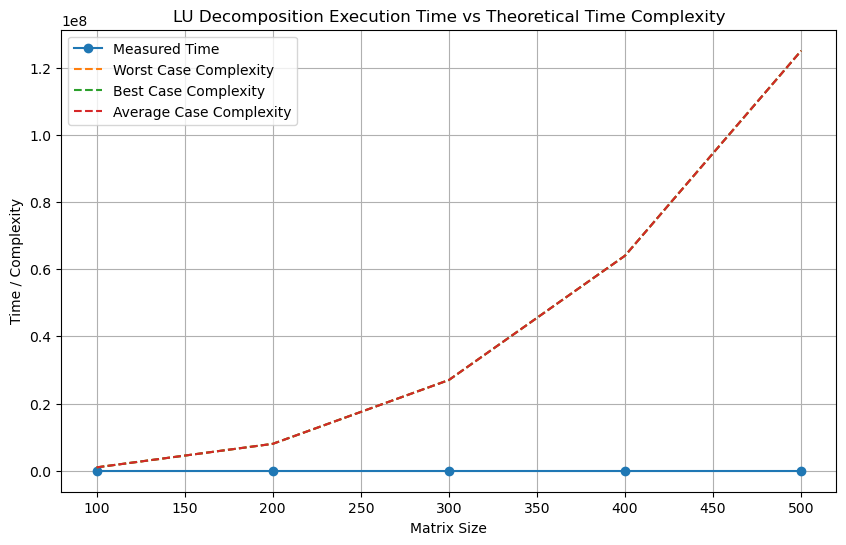

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

def lu_decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for k in range(n):
        U[k, k:] = A[k, k:]
        L[k:, k] = A[k:, k] / U[k, k]
        
        for i in range(k + 1, n):
            U[i, k:] -= L[i, k] * U[k, k:]
    
    # Fill 1s on the diagonal of L
    for i in range(n):
        L[i, i] = 1
    
    return L, U

# Benchmark function
def benchmark_lu_decomposition(matrix_sizes):
    execution_times = []
    for size in matrix_sizes:
        A = np.random.rand(size, size)  # Generate a random matrix of given size
        start_time = time.time()
        L, U = lu_decomposition(A)
        end_time = time.time()
        execution_times.append(end_time - start_time)
    return execution_times

# Theoretical time complexities for LU decomposition
def worst_case(n):
    return n**3

def best_case(n):
    return n**3  # In LU decomposition, best case is the same as worst case

def average_case(n):
    return n**3  # For simplicity, assuming average-case complexity is the same as worst-case

# Matrix sizes to benchmark
matrix_sizes = [100, 200, 300, 400, 500]

# Benchmark LU decomposition
execution_times = benchmark_lu_decomposition(matrix_sizes)

# Compute theoretical complexities for each matrix size
worst_case_times = [worst_case(n) for n in matrix_sizes]
best_case_times = [best_case(n) for n in matrix_sizes]
average_case_times = [average_case(n) for n in matrix_sizes]

# Plotting
plt.figure(figsize=(10, 6))

# Plot measured execution times
plt.plot(matrix_sizes, execution_times, marker='o', label='Measured Time')

# Plot theoretical complexities
plt.plot(matrix_sizes, worst_case_times, linestyle='--', label='Worst Case Complexity')
plt.plot(matrix_sizes, best_case_times, linestyle='--', label='Best Case Complexity')
plt.plot(matrix_sizes, average_case_times, linestyle='--', label='Average Case Complexity')

plt.title('LU Decomposition Execution Time vs Theoretical Time Complexity')
plt.xlabel('Matrix Size')
plt.ylabel('Time / Complexity')
plt.legend()
plt.grid(True)
plt.show()
